In [20]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx')

In [23]:
df.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [24]:
df = df.rename(columns = {'REG_DATE':'기준일', 'P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국',
                        'P_PURPOSE':'수입용도','CATEGORY_1':'중분류명 카테고리',
                        'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태',
                        'P_PRICE':'target'})

In [25]:
# 상세어종에서 연어인 데이터만 빼준다.
df = df[df['상세어종'] == '연어']

# 데이터의 index를 다시 설정해준다.
df = df.reset_index(drop = True)

In [26]:
df.head()

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target
0,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.936815
1,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.146755
2,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.082384
3,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826
4,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,8.844281


In [27]:
# 필요가 없는 데이터는 제거한다.
df = df.drop(['제품구분','중분류명 카테고리','어종','상세어종'], axis = 1)

In [28]:
df.head()

,기준일,제조국,수출국,수입용도,수입형태,target
0,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F)",12.936815
1,2015-12-28,노르웨이,노르웨이,판매용,"냉장,포장횟감,필렛(F)",19.146755
2,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",12.082384
3,2015-12-28,노르웨이,노르웨이,자사제품제조용,"냉장,필렛(F)",13.425826
4,2015-12-28,노르웨이,노르웨이,판매용,냉장,8.844281


In [29]:
연어_수입형태 = set()

for index in df.index:
    value_list = df.loc[index, '수입형태'].split(',')

    연어_수입형태.update(value_list)

# 고유한 수입형태에 모두 0 넣어주기
df[list(연어_수입형태)] = 0

for index in df.index:

    value_list = df.loc[index, '수입형태'].split(',')

    for value in value_list:
        df.loc[index, value] = 1

In [32]:
df = df.reset_index(drop = True)

In [33]:
df

,기준일,제조국,수출국,수입용도,수입형태,target,포장횟감,냉장,필렛(F),곤이,슬라이스(S),횟감,냉동
0,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F)",12.936815,0,1,1,0,0,0,0
1,2015-12-28,노르웨이,노르웨이,판매용,"냉장,포장횟감,필렛(F)",19.146755,1,1,1,0,0,0,0
2,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",12.082384,0,1,1,0,0,1,0
3,2015-12-28,노르웨이,노르웨이,자사제품제조용,"냉장,필렛(F)",13.425826,0,1,1,0,0,0,0
4,2015-12-28,노르웨이,노르웨이,판매용,냉장,8.844281,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,2019-12-30,노르웨이,노르웨이,판매용,"냉장,필렛(F)",16.495971,0,1,1,0,0,0,0
1485,2019-12-30,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",18.350634,0,1,1,0,0,1,0
1486,2019-12-30,노르웨이,노르웨이,자사제품제조용,냉장,11.128269,0,1,0,0,0,0,0
1487,2019-12-30,노르웨이,노르웨이,자사제품제조용,"냉장,필렛(F)",15.631531,0,1,1,0,0,0,0


# EDA

In [35]:
df['수입형태'].unique()

array(['냉장,필렛(F)', '냉장,포장횟감,필렛(F)', '냉장,필렛(F),횟감', '냉장', '냉동', '냉동,곤이',
       '냉동,슬라이스(S),포장횟감', '냉동,필렛(F)'], dtype=object)

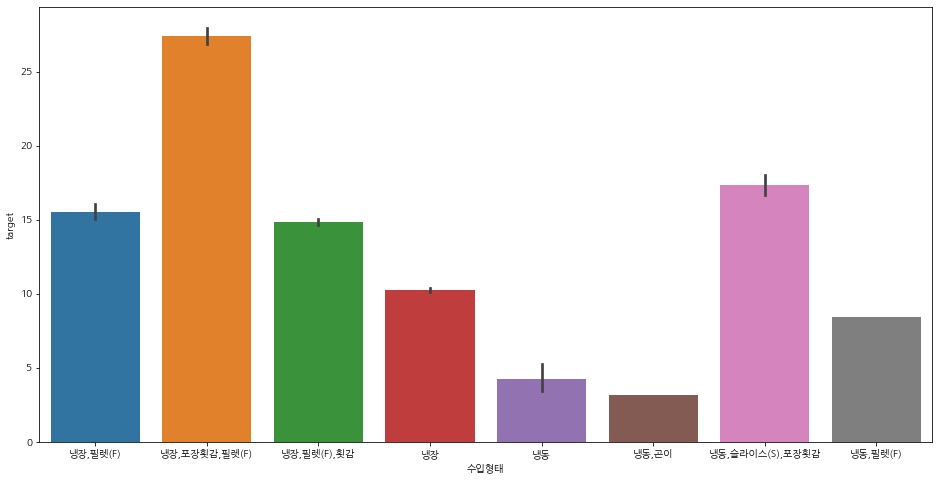

In [34]:
# 수입형태별로 살펴보자.
plt.figure(figsize = (16,8))
sns.barplot(data = df, x = '수입형태', y = 'target')

In [36]:
# 냉장인 데이터와 냉동인 데이터를 나눠주면 더 좋은 성과를 낼 것 같다.
# 베트남의 데이터만 있는 것으로 확인다.
df[df['수입형태'] == '냉동,슬라이스(S),포장횟감']된

,기준일,제조국,수출국,수입용도,수입형태,target,포장횟감,냉장,필렛(F),곤이,슬라이스(S),횟감,냉동
871,2018-05-14,베트남,베트남,판매용,"냉동,슬라이스(S),포장횟감",18.00000,1,0,0,0,1,0,1
1048,2018-11-05,노르웨이,베트남,판매용,"냉동,슬라이스(S),포장횟감",16.63513,1,0,0,0,1,0,1


In [39]:
# 다른 데이터의 수입형태별로 데이터가 얼마나 있는지 확인해 보자.
for i in df['수입형태'].unique():
  print(f'{i}의 개수 :',len(df[df['수입형태'] == i]))

냉장,필렛(F)의 개수 : 420
냉장,포장횟감,필렛(F)의 개수 : 211
냉장,필렛(F),횟감의 개수 : 236
냉장의 개수 : 602
냉동의 개수 : 16
냉동,곤이의 개수 : 1
냉동,슬라이스(S),포장횟감의 개수 : 2
냉동,필렛(F)의 개수 : 1


In [42]:
# 냉동데이터와 냉장 4개로 변수 5개로 만들어서 진행해 준다면 어떨까?
df['수입형태변형'] = df['수입형태'].apply(lambda x:x[:2] if x[:2] == '냉동' else x)

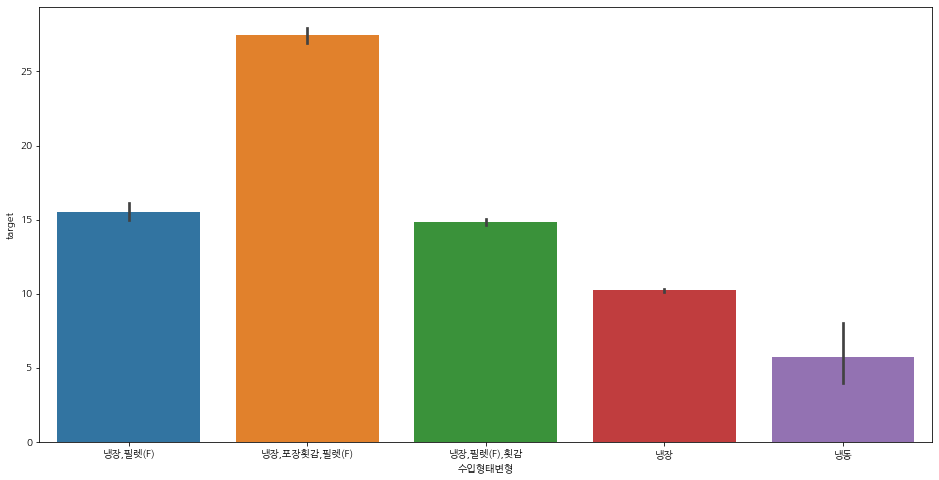

In [43]:
# barplot으로 살펴보도록 하자.
plt.figure(figsize =(16,8))
sns.barplot(data = df, x = '수입형태변형', y = 'target')

## 수입용도

In [44]:
df['수입용도'].unique()

array(['판매용', '자사제품제조용', '외화획득용 원료'], dtype=object)

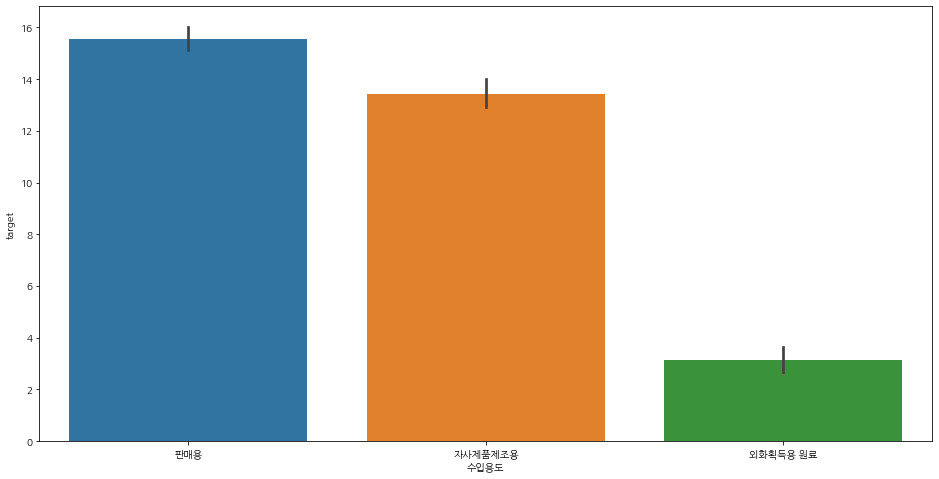

In [45]:
plt.figure(figsize = (16,8))
sns.barplot(data = df, x = '수입용도', y = 'target')

In [49]:
# 수입용도별 수입형태의 차이점이 있는지 확인해 보자.
for i in df['수입용도'].unique():
  print(f'{i}의 수입형태 :',df[df['수입용도'] == i]['수입형태변형'].unique())
  print()

판매용의 수입형태 : ['냉장,필렛(F)' '냉장,포장횟감,필렛(F)' '냉장,필렛(F),횟감' '냉장' '냉동']

자사제품제조용의 수입형태 : ['냉장,필렛(F)' '냉장' '냉장,필렛(F),횟감']

외화획득용 원료의 수입형태 : ['냉동']



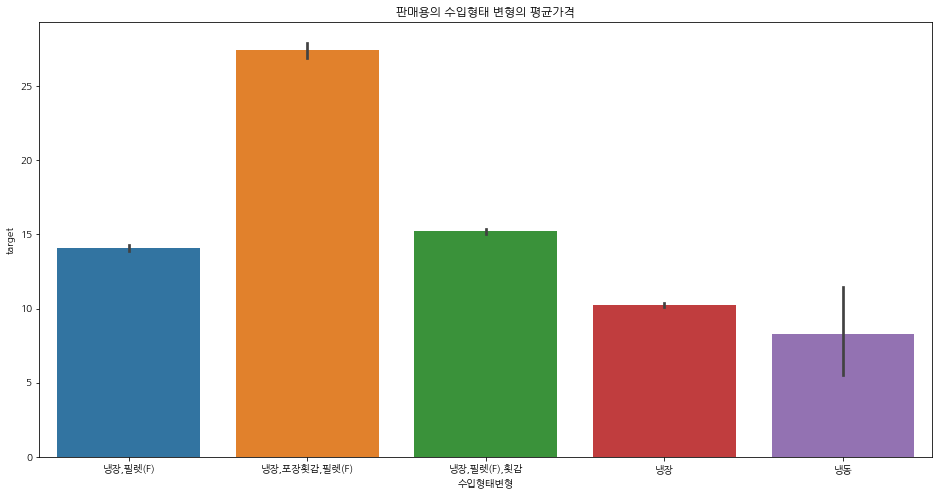

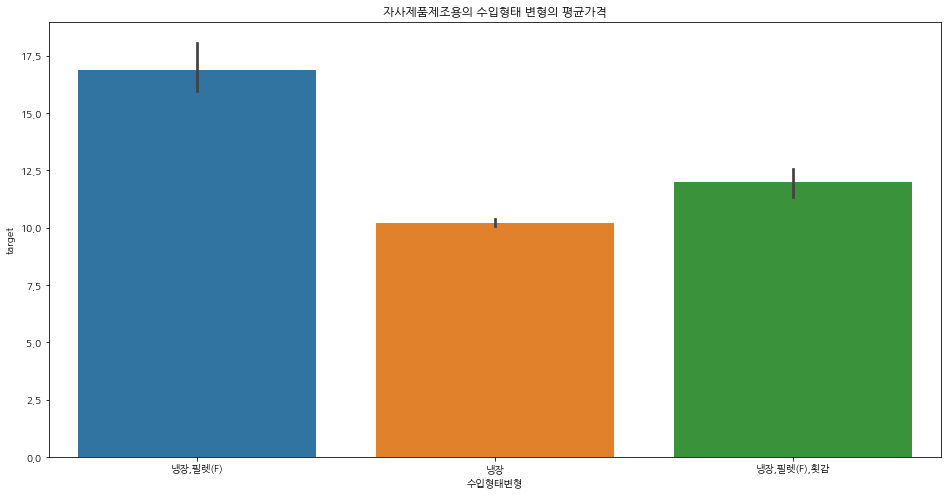

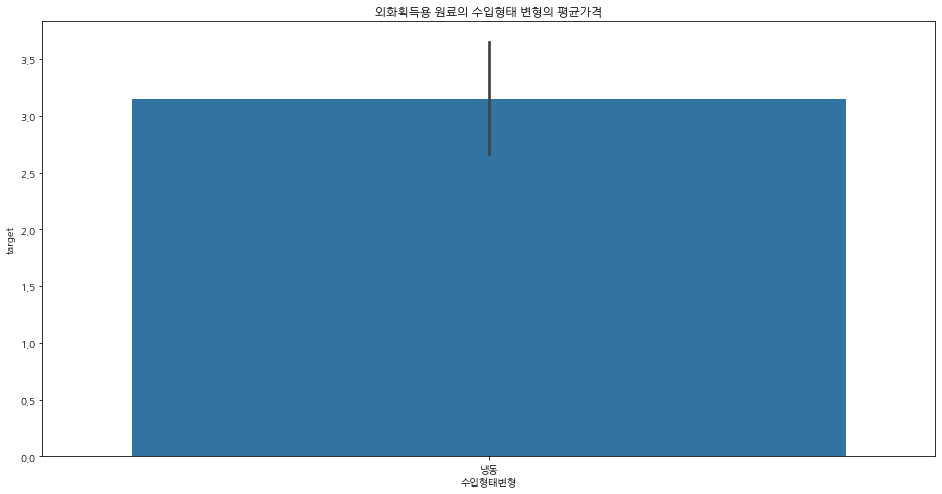

In [52]:
# 판매용은 (냉장,필렛,횟감)이 (냉장,필렛)보다 더 높은 가격이지만 자사제품제조용에서는 (냉장,필렛)이 더 높은 가격대가 형성되어 있다.
for i in df['수입용도'].unique():
  plt.figure(figsize = (16,8))
  sns.barplot(data = df[df['수입용도'] == i], x = '수입형태변형', y = 'target')
  plt.title(f'{i}의 수입형태 변형의 평균가격')
  plt.show()

In [58]:
# 각 수입용도별로 몇개씩 있는지 확인해 보자.
for i in df['수입용도'].unique():
  print(f'{i} 수입용도')
  for j in df[df['수입용도'] == i]['수입형태'].unique():
    print(f'{j}의 개수 :',len(df[(df['수입용도'] == i) & (df['수입형태'] == j)]))
  print()

판매용 수입용도
냉장,필렛(F)의 개수 : 210
냉장,포장횟감,필렛(F)의 개수 : 211
냉장,필렛(F),횟감의 개수 : 207
냉장의 개수 : 387
냉동의 개수 : 6
냉동,곤이의 개수 : 1
냉동,슬라이스(S),포장횟감의 개수 : 2
냉동,필렛(F)의 개수 : 1

자사제품제조용 수입용도
냉장,필렛(F)의 개수 : 210
냉장의 개수 : 215
냉장,필렛(F),횟감의 개수 : 29

외화획득용 원료 수입용도
냉동의 개수 : 10



## 나라별로 살펴보기

In [59]:
df.head()

,기준일,제조국,수출국,수입용도,수입형태,target,포장횟감,냉장,필렛(F),곤이,슬라이스(S),횟감,냉동,수입형태변형
0,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F)",12.936815,0,1,1,0,0,0,0,"냉장,필렛(F)"
1,2015-12-28,노르웨이,노르웨이,판매용,"냉장,포장횟감,필렛(F)",19.146755,1,1,1,0,0,0,0,"냉장,포장횟감,필렛(F)"
2,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",12.082384,0,1,1,0,0,1,0,"냉장,필렛(F),횟감"
3,2015-12-28,노르웨이,노르웨이,자사제품제조용,"냉장,필렛(F)",13.425826,0,1,1,0,0,0,0,"냉장,필렛(F)"
4,2015-12-28,노르웨이,노르웨이,판매용,냉장,8.844281,0,1,0,0,0,0,0,냉장
